<a id='ej1'></a>
# Introduction

In this notebook I explore the performance of different supervised machine learning (ML) algorithms using a synthetic dataset, Spiral, which consists of 4 intercalated spirals situated in a two-dimensional space.

The performance of each ML algorithm is evaluated as its capacity to predict the class of new data points based on their coordinates (x, y).

The dataset consists of 2000 data points distributed in 4 classes, one for each spiral.

The following supervised ML algorithms will be used in the notebook:
-Naive-Bayes
-Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA)
-K-nearest neighbors (KNN)
-Support vector machines (SVM)
-Decission trees

Each of the algorithms has peculiarities that affect its performance and make it more or less prone to overfitting. I will describe which are these peculiarities and how they affect the outcomes.

There is a "environment.yaml" file with the required packages and versions as well as a "spiral.pickle" file containing the data points and labels in this repository

This notebook derives from exercises performed in the Data Science MSc by UOC

In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
%matplotlib inline

X dimensions (2000, 2)
y dimensions (2000,)


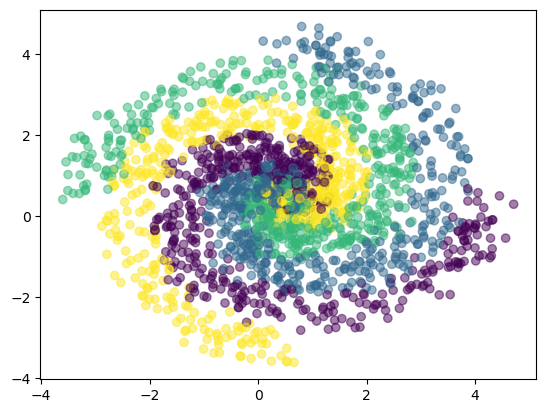

In [2]:
data = pd.read_pickle('spiral.pickle')

# Convert the attributes containing x and y coordinates information to a numpy array
X = data[['X1', 'X2']].values

# Convert the labels attribute to a numpy array
y = data['y'].values

print('X dimensions', X.shape)
print('y dimensions', y.shape)

# Graphic representation of the dataset
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.viridis, alpha=0.5)
plt.show()

Through this notebook I will show the prediction that several supervised ML algorithms return for part of the points in this dataset. In order to better visualize how each algorithm would assign each (x, y) point to any of the 4 classes, and to better understand how each algorithm works, I will also plot, for each algorithm, the decision boundary. To do so, I will use this function:

In [3]:
def plot_decision_boundary(clf, X, Y, cmap='Paired'):
    if not isinstance(X, np.ndarray):  # If X is not a numpy array, converts it
        X = X.to_numpy()

    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k', label=Y);

I will divide the data points in a training and a test sets. The training set will contain 80% of the data points 

In [4]:
random_state = 24 # Ensure replicability

# Data points separation
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state = random_state)

## 1.1. Gaussian Naïve Bayes

The Naïve-Bayes algorithm has as its main assumption the independence of the variables. It basically employs Bayesian statistics to calculate the probability that a sample has of belonging to any of the (in this case) 4 classes depending on the values for each of its variables. as stated above, it assumes that the different variables are independent and, therefore, does not consider the possibility that, for instance, the values for the y variable might have an impact on the class of the sample for different values of the x variable. 

This is the implementation of the algorithm with the dataset:

In [5]:
# Instantiate and train the model
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

In [6]:
# Calculate the accuracy for training and test sets
prediction_train_nb = clf_nb.predict(X_train)
accuracy_train_nb = accuracy_score(y_train, prediction_train_nb)
print("Accuracy for the training set is: "+str(accuracy_train_nb))

prediction_test_nb = clf_nb.predict(X_test)
accuracy_test_nb = accuracy_score(y_test, prediction_test_nb)
print("Accuracy for the test set is: "+str(accuracy_test_nb))

Accuracy for the training set is: 0.294375
Accuracy for the test set is: 0.2475


In [7]:
# Show the confusion matrix
confusion_matrix_nb = confusion_matrix(y_test, prediction_test_nb)
confusion_matrix_nb

array([[15, 27, 27, 33],
       [32, 37, 10, 31],
       [32, 35, 23,  9],
       [18, 23, 24, 24]], dtype=int64)

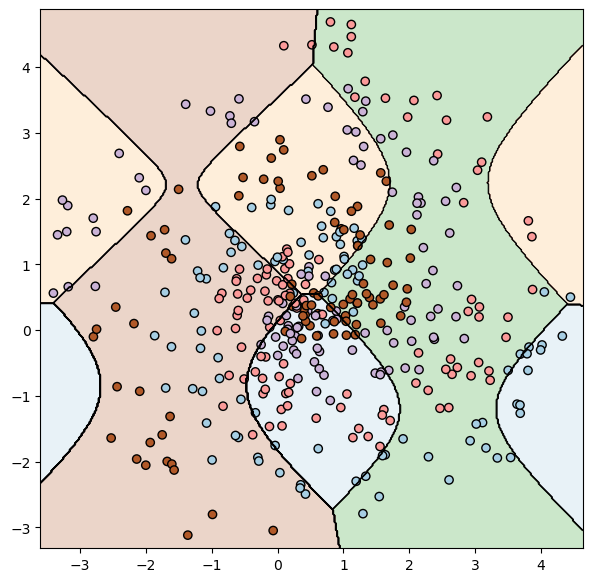

In [8]:
# Plot the decision boundary
plot_decision_boundary(clf_nb, X_test, y_test)

The Naive-Bayes algorithm's main assumption is the independence of variables. This is a dataset in which we clearly see that, for a given label, such independence does not exist. If we are given an x for the blue label, for example, we can approximate the value that y will have. Therefore, this dataset violates the main assumption of the algorithm. The decision boundaries shown by the algorithm are complex and poorly adapt to the real distribution of the data due to the high dependence of variables for a point of any given class. Regarding predictions on the test set, we also see poor performance. The accuracy is only 0.2475, close to randomness.

## 1.2. Linear discriminant analysis and quadratic discriminant analysis (QDA)

### 1.2.1 Linear discriminant analysis (LDA)

The LDA algorithm assumes a Gaussian distribution of the samples and tries to estimate the parameters of that hypothetical distribution. It seeks to find linear discriminants that best separate the samples given their labels. 

This is the implementation of the algorithm with the dataset:

In [9]:
# Instantiate and train the model
clf_ld = LinearDiscriminantAnalysis()
clf_ld.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
# Calculate the accuracy for training and test sets
prediction_train_ld = clf_ld.predict(X_train)
accuracy_train_ld = accuracy_score(y_train, prediction_train_ld)
print("Accuracy for the training set is: "+str(accuracy_train_ld))

prediction_test_ld = clf_ld.predict(X_test)
accuracy_test_ld = accuracy_score(y_test, prediction_test_ld)
print("Accuracy for the test set is: "+str(accuracy_test_ld))

Accuracy for the training set is: 0.255
Accuracy for the test set is: 0.2475


In [11]:
# Show the confusion matrix
confusion_matrix_ld = confusion_matrix(y_test, prediction_test_ld)
confusion_matrix_ld

array([[24, 29, 24, 25],
       [27, 27, 21, 35],
       [27, 28, 24, 20],
       [17, 25, 23, 24]], dtype=int64)

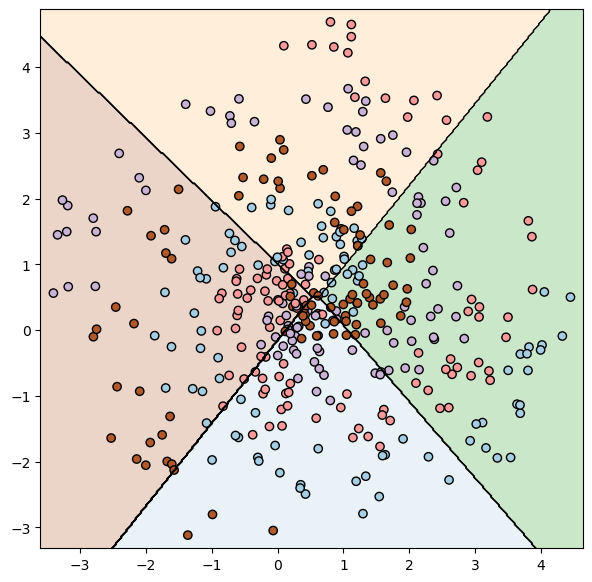

In [12]:
# Plot the decision boundary
plot_decision_boundary(clf_ld, X_test, y_test)

As stated above, LDA algorithm seeks to find linear discriminants that best separate the samples given their labels. It is the linear nature of these discriminants that gives the decision boundaries the shape we see. Similarly to what we saw with Naïve Bayes, this dataset does not fit well with the nature of our dataset. The boundaries between the data of different classes are not linear, and therefore the discriminants that the algorithm finds do not properly classify the samples of the test dataset. It is interesting to note how algorithms can fail in a very similar way (the accuracy with both the Naive Bayes algorithm and the LDA algorithm) for radically different reasons. In the case of Naive Bayes, there should not be major issues because the classes are separated by a curve instead of a line (something that negatively affects LDA), while in the case of LDA, the dependence of the variables should not be as important as for Naive Bayes. We can conclude that neither of the two allows us to correctly classify the data, but by evaluating the decision boundaries, the dataset we have, and the assumptions of each algorithm, we are closer to understanding the reasons underlying the "quality" of each algorithm and thus be able to choose the most optimal one on each occasion.

### 1.2.2 Quadratic discriminant analysis (LDA)
The 
QDA also assumes (like LDA) a Gaussian distribution of the data but it, relaxes certain restrictions that LDA has (such as the existence of a common covariance matrix for each class), and estimates more parameters of the samples, this time through a quadratic equation. 

This is the implementation of the algorithm with the dataset:

In [13]:
# Instantiate and train the model
clf_qd = QuadraticDiscriminantAnalysis()
clf_qd.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [14]:
# Calculate the accuracy for training and test sets
prediction_train_qd = clf_qd.predict(X_train)
accuracy_train_qd = accuracy_score(y_train, prediction_train_qd)
print("Accuracy for the training set is: "+str(accuracy_train_qd))

prediction_test_qd = clf_qd.predict(X_test)
accuracy_test_qd = accuracy_score(y_test, prediction_test_qd)
print("Accuracy for the test set is: "+str(accuracy_test_qd))

Accuracy for the training set is: 0.26375
Accuracy for the test set is: 0.215


In [15]:
# Show the confusion matrix
confusion_matrix_qd = confusion_matrix(y_test, prediction_test_qd)
confusion_matrix_qd

array([[28, 13, 33, 28],
       [40, 18, 11, 41],
       [38, 36, 19,  6],
       [16, 29, 23, 21]], dtype=int64)

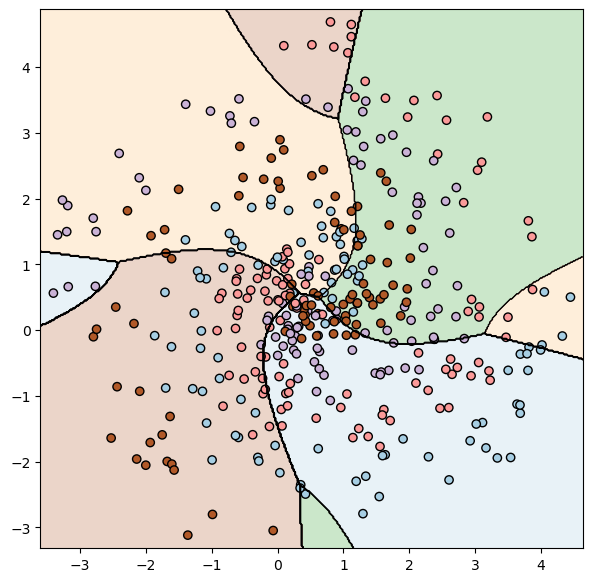

In [16]:
# Plot the decision boundary
plot_decision_boundary(clf_qd, X_test, y_test)

The quadratic nature of the equation that QDA algorithm employs is the reason for the shape of the decision boundaries, which resemble a set of representations of quadratic functions. We observe that the accuracy of the algorithm is also quite low (in fact, lower than that of LDA, which was close to random assignment). We can understand the reason if we look at the decision boundaries. The curves in these boundaries are clearly less pronounced than the curves in the spirals, so clearly the algorithm does not have the ability to "adapt" to the dataset.<br>

Here some insights about the two algorithms:<br>

Assumptions:<br>
LDA: Assumes that all classes have the same covariance matrix and that the predictor variables are normally distributed. This implies that classes mainly differ in terms of their mean.<br>
QDA: Relax the assumption that all classes share the same covariance matrix. Each class can have its own covariance matrix, making the model more flexible in representing the data structure.<br>

Approach:<br>
LDA: Seeks the hyperplane that best separates the classes by maximizing the separation between class means and minimizing dispersion within each class.<br>
QDA: By allowing different covariance matrices, it models the covariance structure of each class more precisely. This can capture nonlinear relationships and more complex distributions in the data.<br>

Results on the data:<br>
LDA: Gives us a result similar to what would be expected if we assigned the samples randomly, because the classification boundaries are linear and occupy the same area radiating from the center.<br>
QDA: Gives us a slightly inferior result. Probably because of the "shape" it gives to the decision boundaries, which do not fit the spirals well enough, it ends up providing worse accuracy.

### 1.3 K-nearest neighbors (KNN)

Conceptually one of the most straightforward supervised ML models, KNN is based in the proximity of data points in the space defined by the values of their variables. Basically, the idea is that points that lie close in this n-dimensional space (being n the number of variables) are more likely to be part of the same class. So, in order to classify a new point, the algorithm will take into consideration the k-nearest data points for which we have a label and then chose the class with more of these k data points in it.

In the case of KNN, I will start by showing the result with an arbitrary value of k and then I will perform a grid search (that is, re-running the model with a set of values of k) and evaluate the performance of the model with each of these values to find the optimal k value.

This is the implementation of the algorithm with the dataset for k=2:

In [17]:
# Instantiate and train the model
neigh_2 = KNeighborsClassifier(n_neighbors=2)
neigh_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [18]:
# Calculate the accuracy for training and test sets
prediction_train_neigh_2 = neigh_2.predict(X_train)
accuracy_train_neigh_2 = accuracy_score(y_train, prediction_train_neigh_2)
print("Accuracy for the training set is: "+str(accuracy_train_neigh_2))

prediction_test_neigh_2 = neigh_2.predict(X_test)
accuracy_test_neigh_2 = accuracy_score(y_test, prediction_test_neigh_2)
print("Accuracy for the test set is: "+str(accuracy_test_neigh_2))

Accuracy for the training set is: 0.883125
Accuracy for the test set is: 0.775


In [19]:
# Show confusion matrix
confusion_matrix_neigh_2 = confusion_matrix(y_test, prediction_test_neigh_2)
confusion_matrix_neigh_2

array([[88,  6,  1,  7],
       [11, 93,  5,  1],
       [ 5, 15, 77,  2],
       [14,  5, 18, 52]], dtype=int64)

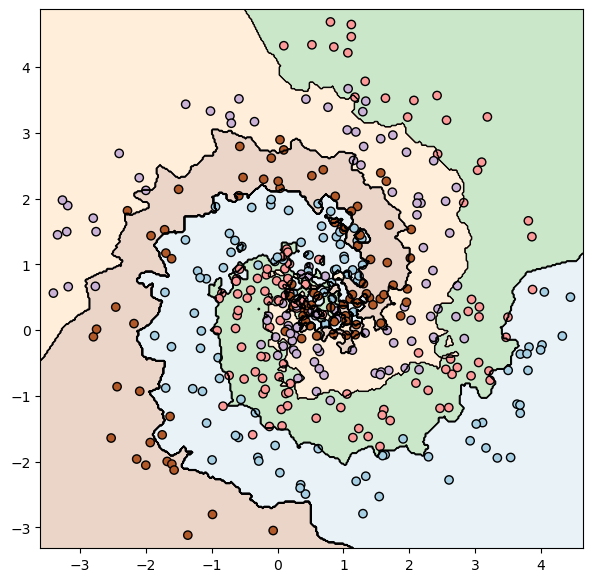

In [20]:
# Plot the decision boundary
plot_decision_boundary(neigh_2, X_test, y_test)

KNN is the first of the models tried so far that gives a fairly good prediction accuracy. However, the value of the k parameter has been established in an arbitrary manner. I will now implement a grid search to find the best k parameter in the range (1, 20)

In [21]:
# Implement the grid search
parameters = {'n_neighbors':np.arange(1,21)}

neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters, scoring="accuracy", cv=5)
clf.fit(X_train, y_train)

results = clf.cv_results_

In [22]:
# Show the best k value
clf.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In each iteration, the grid search uses several rounds (in this case 5, as stated in the cv parameter)  of cross-validation (taking part of the data points to test the accuracy of the model). This is the average accuracy of the cross-validation for each k value tested:

In [23]:
# Average accuracy for each k value
results["mean_test_score"]

array([0.74875 , 0.76125 , 0.78125 , 0.778125, 0.79375 , 0.794375,
       0.79125 , 0.795625, 0.785625, 0.79625 , 0.798125, 0.791875,
       0.800625, 0.80125 , 0.80375 , 0.803125, 0.793125, 0.798125,
       0.79875 , 0.799375])

<Axes: >

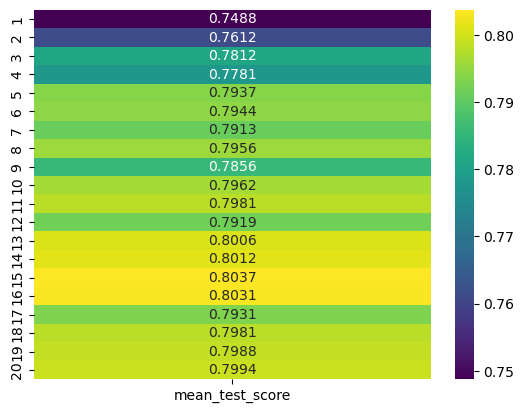

In [24]:
# Show the average values in a heatmap
df = pd.DataFrame({"mean_test_score":results["mean_test_score"]}, index = np.arange(1, 21))
df
sns.heatmap(df, annot=True, fmt = ".4f", cmap="viridis")

The best k value, according to the grid search, is 15. I will implement the KNN model setting k = 15

In [25]:
# Instantiate and train the model
neigh_15 = KNeighborsClassifier(n_neighbors=15)
neigh_15.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [26]:
# Calculate the accuracy for training and test sets
prediction_train_neigh_15 = neigh_15.predict(X_train)
accuracy_train_neigh_15 = accuracy_score(y_train, prediction_train_neigh_15)
print("Accuracy for the training set is: "+str(accuracy_train_neigh_15))

prediction_test_neigh_15 = neigh_15.predict(X_test)
accuracy_test_neigh_15 = accuracy_score(y_test, prediction_test_neigh_15)
print("Accuracy for the test set is: "+str(accuracy_test_neigh_15))

Accuracy for the training set is: 0.83125
Accuracy for the test set is: 0.79


In [27]:
# Show the confusion matrix
confusion_matrix_neigh_15 = confusion_matrix(y_test, prediction_test_neigh_15)
confusion_matrix_neigh_15

array([[75,  9,  2, 16],
       [ 8, 93,  9,  0],
       [ 5,  7, 82,  5],
       [10,  3, 10, 66]], dtype=int64)

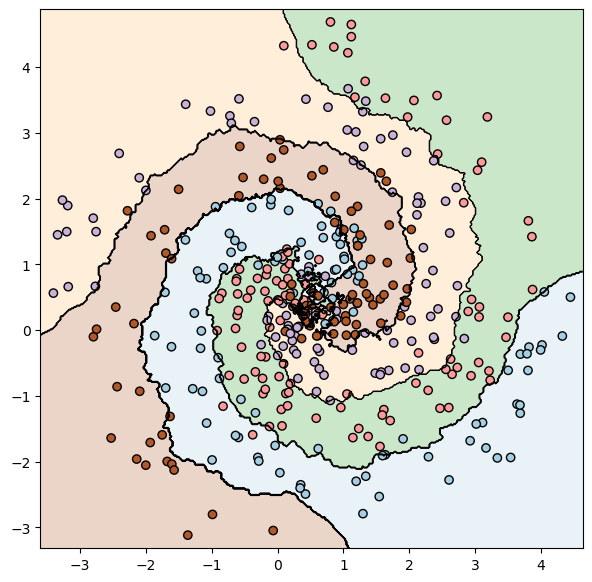

In [28]:
# Plot the decision boundary
plot_decision_boundary(neigh_15, X_test, y_test)

In KNN, we find the first algorithm that truly produces positive results. When searching for the best value for n_neighbors, we used values between 1 and 20 using a grid search cross-validation. Since we only had one parameter to modify, the heatmap only has one dimension, but it's easy to see that there is a peak of accuracy at the value 15, around which the accuracy values gradually decrease. It is interesting to understand how accuracy has varied with the two values of n_neighbors that we have studied in depth. It will also help us understand what is happening at the decision boundary. We see that the decision boundary in the case of n_neighbors = 2 is much more abrupt in local terms. This makes sense because with low values of n_neighbors, the model becomes more "flexible," fitting too closely to the particularities of the training dataset, which can lead to overfitting. On the contrary, the decision boundaries for the value of n_neighbors = 15 are much smoother. This is because, as the number of neighbors increases, the local peculiarities of small groups of points become less relevant locally to the decision boundary, and therefore its shape is smoother. It is important to find an appropriate balance because with too high values of n_neighbors, we could have had underfitting problems. But, returning to the accuracy with the two values of n_neighbors, we see that the accuracy for the training dataset is higher for the value of n_neighbors = 2, while the accuracy for the test dataset is higher for the value of n_neighbors = 15. Taking into account what we just discussed about the tendency to overfitting with too low values of n_neighbors, it's easy to interpret that the high accuracy value for the training dataset is due to that possible overfitting. However (and according to what our cross-validation grid showed us), it seems that the optimal value of the two is actually n_neighbors = 15, which gives us higher accuracy for the dataset that it hadn't "seen" during training.

### 1.4 Support Vector Machine (SVM)

Based on the concepts of maximal margin hyperplane, support vector machines attepmt to find the hyperplane (that is, the subspace of p-1 dimensions being p the number of attributes of the dataset) that separates the elements of the classes with the largest possible margin.

There are two main hyperparameters that need to be optimized in order to maximize the classification performance:

<strong>C</strong>.- This is a regularization hyperparameter that balances maximizing the margin and minimizing the classification error. Smaller values allow for larger margins but give rise to models with larger errors and vice versa.

<strong>Gamma</strong>.- One particularity of SVMs is the use of a <strong>kernel</strong> that allows transforming the attributes space into a higher dimensional space that, in turn, enables finding the hyperplane that separates the classes linearly, even in cases where the classes are not linearly separable in the original attributes space. The value of the gamma hyperparameter determines the influence of each point of the dataset in the shape of the decission boundary and how smooth the hyperplane is. 

In order to optimize these two parameters I will implement a grid search:

In [29]:
# Implement the grid search
parameters = {'C':[0.01, 0.1, 1, 10, 50, 100, 200], "gamma":[0.001, 0.01, 0.1, 1, 10]}

svm = SVC()

clf = GridSearchCV(svm, parameters, scoring="accuracy", cv=4)
clf.fit(X_train, y_train)

results = clf.cv_results_

In [30]:
# Show the best C and gamma values
clf.best_estimator_

SVC(C=50, gamma=1)

<Axes: xlabel='param_gamma', ylabel='param_C'>

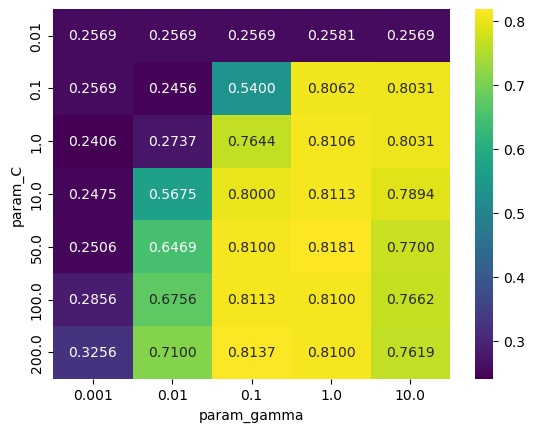

In [31]:
# Show the grid search outcome in a heatmap
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
    values='mean_test_score', index='param_C', columns='param_gamma')

sns.heatmap(pvt, annot = True, fmt = ".4f", cmap="viridis")